----------------------------------------
Model Performance (R2 Score): 0.6983
Mean Squared Error (MSE): 0.3594
----------------------------------------


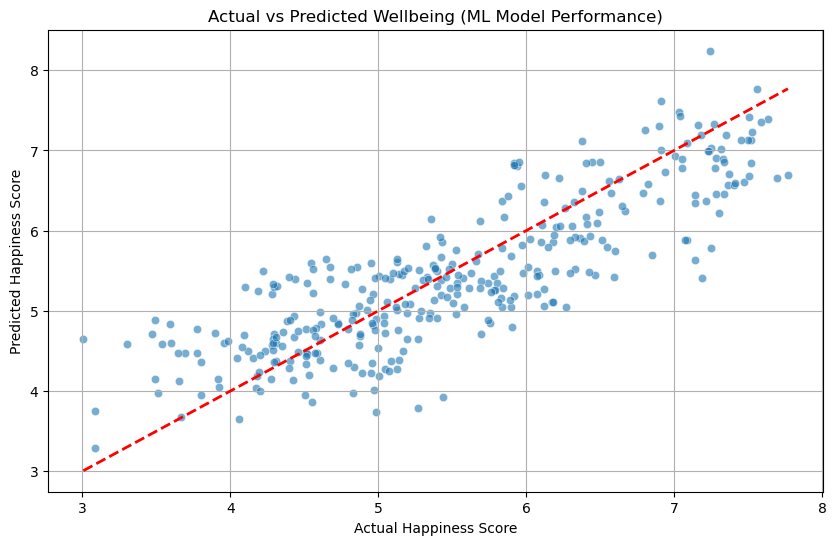

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data
try:
    happiness = pd.read_csv(r"C:\Users\blgnd\OneDrive\Masaüstü\gdp-vs-happiness.csv")
    expenditure = pd.read_csv(r"C:\Users\blgnd\OneDrive\Masaüstü\annual-healthcare-expenditure-per-capita.csv")
    life_expectancy = pd.read_csv(r"C:\Users\blgnd\OneDrive\Masaüstü\life-expectancy.csv")
    
    for df_temp in [happiness, expenditure, life_expectancy]:
        df_temp.columns = df_temp.columns.str.strip()

    # 2. Merge and Clean
    df = happiness.merge(expenditure, on=['Entity', 'Code', 'Year'])
    df = df.merge(life_expectancy, on=['Entity', 'Code', 'Year'])
    
    target = 'Cantril ladder score'
    feat_1 = [c for c in df.columns if 'health expenditure' in c.lower()][0]
    feat_2 = [c for c in df.columns if 'expectancy' in c.lower()][0]

    df_ml = df.dropna(subset=[target, feat_1, feat_2])
    X = df_ml[[feat_1, feat_2]]
    y = df_ml[target]

    # 3. Train Model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 4. Results Table
    print("-" * 40)
    print(f"Model Performance (R2 Score): {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
    print("-" * 40)

    # 5. CREATE CHART
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Happiness Score')
    plt.ylabel('Predicted Happiness Score')
    plt.title('Actual vs Predicted Wellbeing (ML Model Performance)')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error: {e}")